In [147]:
import pandas as pd

In [148]:
# Importing the dataset
df=pd.read_csv('/Users/panglu/Documents/2020_Class/Fall - Intro to ML & DM/Term Project/Data/home data.csv')

In [149]:
df.shape

(1460, 81)

In [150]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [151]:
# true/false for valid/missing data
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [152]:
#filling NA's with the mean of the column
df=df.fillna(df.mean())

In [153]:
#dependent variable (y)
y=df["SalePrice"]
#independent variables (x)
x_all=df.loc[:,"MSSubClass":"SaleCondition"]

In [154]:
#Model 1
#numpy linear regression
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [155]:
#create dummy variables for the categorical feature
x=pd.get_dummies(x_all)

#filling NA's with the mean of the column
x=x.fillna(x.mean())

#add a constant one (x0=1)
x = sm.add_constant(x, prepend=True)

In [156]:
x.head(10)

,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1.0,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,1.0,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,1.0,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,1.0,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,1.0,50,85.000000,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,1.0,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,1.0,60,70.049958,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,1.0,50,51.000000,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,1.0,190,50.000000,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [157]:
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     66.67
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:00:28   Log-Likelihood:                -16568.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1206   BIC:                         3.499e+04
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.947e+

In [158]:
#calculate R^2, F1 score, etc for the algorithms

# R^2=0.933

print("R^2 of the prediction:0.933")

R^2 of the prediction:0.933


In [159]:
print(results.params)
type(results.params)

const                    29470.757768
MSSubClass                 -56.237154
LotFrontage                 43.000773
LotArea                      0.706498
OverallQual               6813.056406
                             ...     
SaleCondition_AdjLand    11584.875204
SaleCondition_Alloca      3063.852799
SaleCondition_Family      2588.469631
SaleCondition_Normal      8568.191234
SaleCondition_Partial     1781.451637
Length: 289, dtype: float64


pandas.core.series.Series

In [166]:
print(coef["RoofMatl_Membran"])

146288.85852287506


In [165]:
print(coef.sort_values().tail(10))

Condition2_RRNn       46789.844772
Condition2_Artery     49195.438694
RoofMatl_CompShg      51463.232493
RoofMatl_Tar&Grv      52203.165145
RoofStyle_Shed        78674.087063
Condition2_PosA       91612.799973
GarageQual_Ex         97723.929097
RoofMatl_WdShngl     106146.044871
RoofMatl_Metal       114399.322435
RoofMatl_Membran     146288.858523
dtype: float64


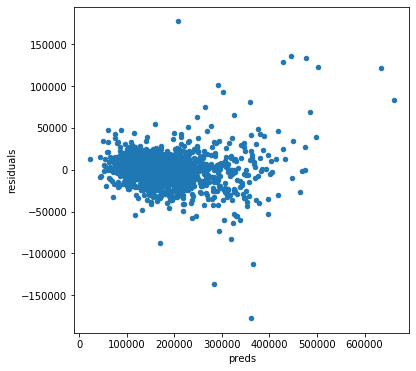

In [163]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":results.predict(x), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

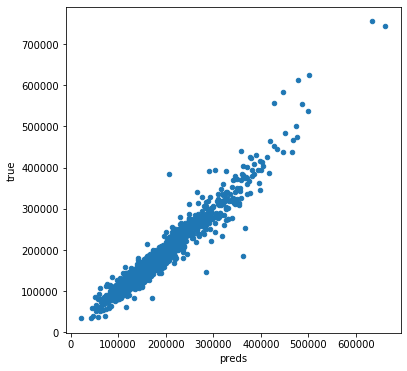

In [164]:
#let's look at the predictions-true values as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":results.predict(x), "true":y})
#preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "true",kind = "scatter")

In [207]:
def rmse_accuracy_percentage(actual,predicted):
    print("RMSE is:",np.round(np.sqrt(sum(((np.array(actual)-np.array(predicted))**2))/len(actual)),2))


rmse_accuracy_percentage(preds["true"],preds["preds"])

RMSE is: 20514.9


In [172]:
#Model 2
# Support Vector Machine (SVM)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
#create dummy variables for the categorical feature
xx=pd.get_dummies(x_all)

#filling NA's with the mean of the column
xx=xx.fillna(xx.mean())

#dependent variable (yy)
yy=df["SalePrice"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.10, random_state = 0)

# Feature Scaling: (x-mu)/sigma 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [178]:
# Fitting SVM to the Training set
from sklearn.svm import SVR
#regr = SVR(kernel = 'linear',C=1.0, epsilon=0.1)
#regr = SVR(kernel = 'poly',C=1.0, epsilon=0.1)
#regr = SVR(kernel = 'rbf',C=1.0, epsilon=0.1)
regr = SVR(kernel = 'linear',C=1.0, epsilon=0.1)
regr.fit(x_train, y_train)
# Predicting the Test set results
svm_y_pred = regr.predict(x_test)

# calculate the R^2 produced by the SVR model
from sklearn.metrics import r2_score
svm_Rsquare=r2_score(y_test,svm_y_pred)
print("R^2 of the prediction:")
print(Rsquare)

# Return the coefficient of determination R^2 of the prediction.
from sklearn.pipeline import make_pipeline
svm_Rsquare=regr.score(x_test, y_test, sample_weight=None)
print("R^2 of the prediction:")
print(svm_Rsquare)

# calculate the root mean squared error produced by the SVR model
from sklearn.metrics import mean_squared_error
svm_mse=mean_squared_error(y_test,svm_y_pred)
svm_rmse=np.sqrt(svm_mse)
print("rmse of the prediction:")
svm_rmse

R^2 of the prediction:
0.22675148181598392
R^2 of the prediction:
0.22675148181598392
rmse of the prediction:


72896.17933878094

In [177]:
svm_coef["OverallQual"]

826.4723560772738

Text(0.5, 1.0, "Coefficients in the SVR(kernel = 'linear') Model")

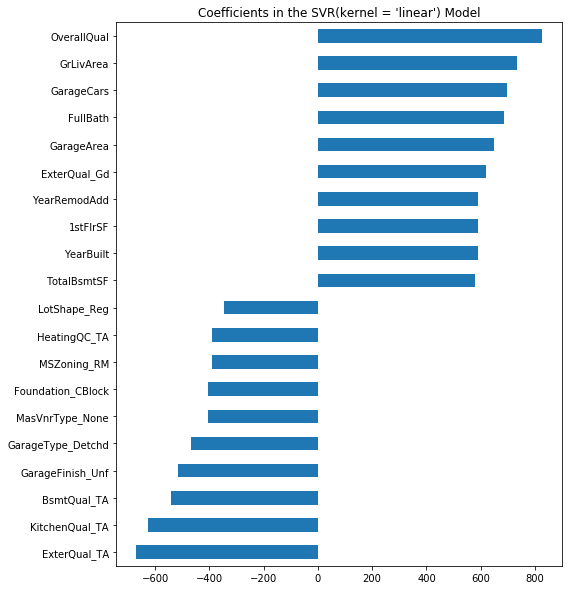

In [176]:
import matplotlib
import matplotlib.pyplot as plt
#coef = results.params

svm_coef=regr.coef_
svm_coef=np.ravel(svm_coef)
svm_coef = pd.Series(svm_coef, index = xx.columns)
svm_imp_coef = pd.concat([svm_coef.sort_values().head(10),svm_coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
svm_imp_coef.plot(kind = "barh")
plt.title("Coefficients in the SVR(kernel = 'linear') Model")

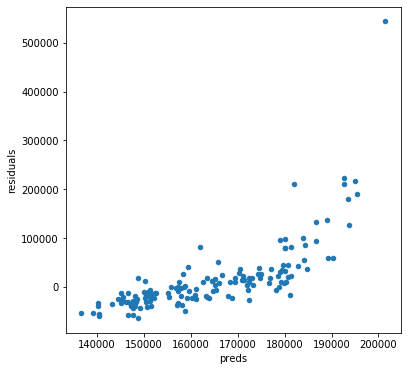

In [213]:
#model 2
#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

svm_preds = pd.DataFrame({"preds":svm_y_pred, "true":y_test})
svm_preds["residuals"] = svm_preds["true"] - svm_preds["preds"]
svm_preds.plot(x = "preds", y = "residuals",kind = "scatter")

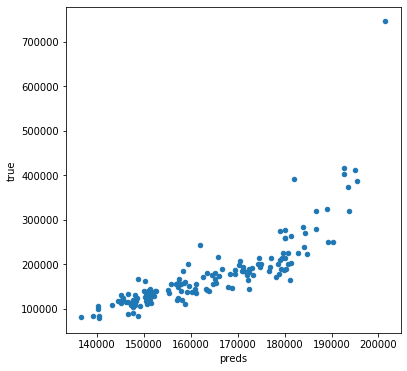

In [214]:
# model2
#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

svm_preds = pd.DataFrame({"preds":svm_y_pred, "true":y_test})
#preds["residuals"] = preds["true"] - preds["preds"]
svm_preds.plot(x = "preds", y = "true",kind = "scatter")

In [133]:
# Model 3
# Random Forest regressor

# Fitting Regressor to the Training set
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)

# fit model
rf_model.fit(x_train, y_train) 

# Predicting the Test set results
rf_y_pred = rf_model.predict(x_test)


# calculate the R^2 produced by the Random Forest model
from sklearn.metrics import r2_score
rf_Rsquare=r2_score(y_test,rf_y_pred)
print("R^2 of the prediction:")
print(rf_Rsquare)


# calculate the root mean squared error produced by the Random Forest model
from sklearn.metrics import mean_squared_error
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_rmse=np.sqrt(rf_mse)
print("rmse of the prediction:")
rf_rmse

R^2 of the prediction:
0.868396163141081
rmse of the prediction:


30073.189705449422

In [193]:
print(rf_coef.sort_values().head(10))

Condition2_RRAn       0.000000e+00
Utilities_AllPub      0.000000e+00
RoofMatl_Membran      0.000000e+00
MiscFeature_Othr      0.000000e+00
RoofMatl_Roll         8.027072e-12
Exterior1st_CBlock    2.899628e-08
ExterCond_Ex          7.009580e-08
Heating_Floor         8.029964e-08
Exterior2nd_Other     1.118915e-07
Condition2_RRAe       1.259331e-07
dtype: float64


Text(0.5, 1.0, 'feature_importances in the Random Forest Model')

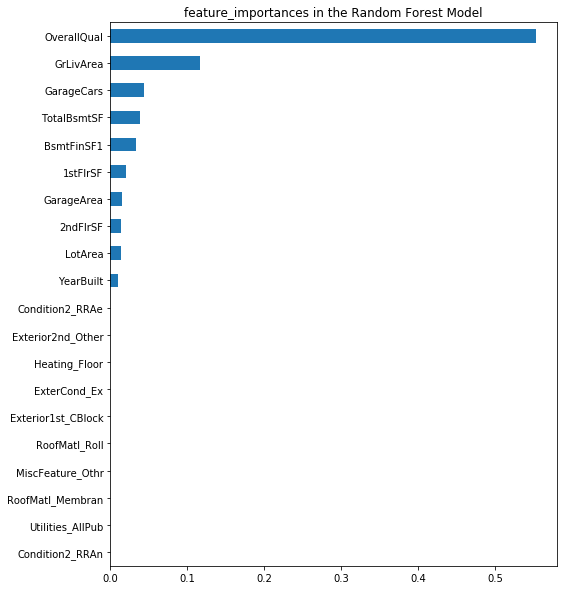

In [217]:
# Model 3
# Random Forest regressor

import matplotlib
import matplotlib.pyplot as plt

rf_coef=rf_model.feature_importances_
rf_coef=np.ravel(rf_coef)
rf_coef = pd.Series(rf_coef, index = xx.columns)
rf_imp_coef = pd.concat([rf_coef.sort_values().head(10),rf_coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
rf_imp_coef.plot(kind = "barh")
plt.title("feature_importances in the Random Forest Model")

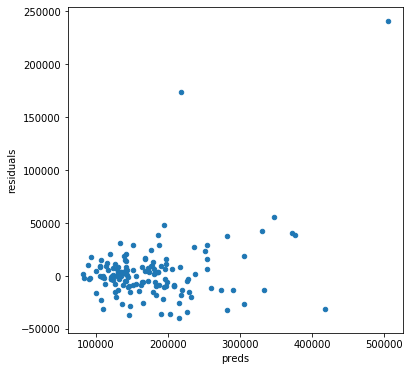

In [212]:
# Model 3
# Random Forest regressor

#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

rf_preds = pd.DataFrame({"preds":rf_y_pred, "true":y_test})
rf_preds["residuals"] = rf_preds["true"] - rf_preds["preds"]
rf_preds.plot(x = "preds", y = "residuals",kind = "scatter")

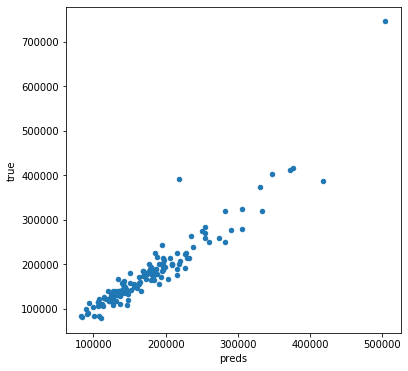

In [184]:
# Model 3
# Random Forest regressor

#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

rf_preds = pd.DataFrame({"preds":rf_y_pred, "true":y_test})
#preds["residuals"] = preds["true"] - preds["preds"]
rf_preds.plot(x = "preds", y = "true",kind = "scatter")

In [140]:
# Model 4
# Decision Tree regressor

# Fitting Regressor to the Training set
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1,max_leaf_nodes=100)

# fit model
dt_model.fit(x_train, y_train) 

# Predicting the Test set results
dt_y_pred = dt_model.predict(x_test)


# calculate the R^2 produced by the DT_model
from sklearn.metrics import r2_score
dt_Rsquare=r2_score(y_test,dt_y_pred)
print("R^2 of the prediction:")
print(dt_Rsquare)


# calculate the root mean squared error produced by the Random Forest model
from sklearn.metrics import mean_squared_error
dt_mse=mean_squared_error(y_test,dt_y_pred)
dt_rmse=np.sqrt(dt_mse)
print("rmse of the prediction:")
dt_rmse

R^2 of the prediction:
0.8243165422012237
rmse of the prediction:


34746.467100274705

Text(0.5, 1.0, 'feature_importances in the Decision Tree Regressor Model')

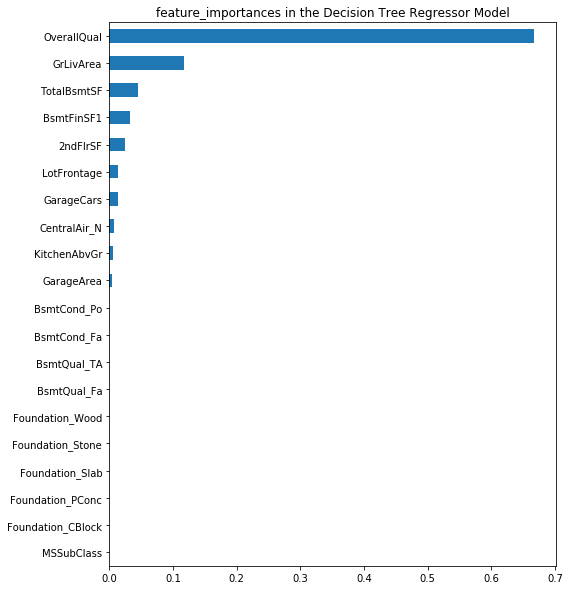

In [218]:
import matplotlib
import matplotlib.pyplot as plt

dt_coef=dt_model.feature_importances_
dt_coef=np.ravel(dt_coef)
dt_coef = pd.Series(dt_coef, index = xx.columns)
dt_imp_coef = pd.concat([dt_coef.sort_values().head(10),dt_coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
dt_imp_coef.plot(kind = "barh")
plt.title("feature_importances in the Decision Tree Regressor Model")

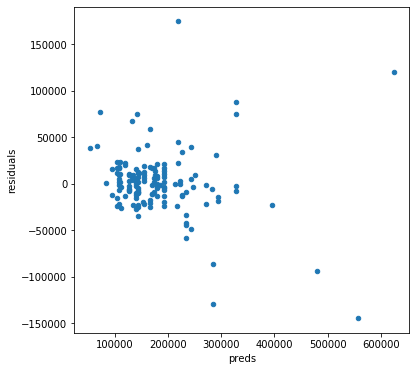

In [215]:
# Model 4
# Decision Tree regressor

#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

dt_preds = pd.DataFrame({"preds":dt_y_pred, "true":y_test})
dt_preds["residuals"] = dt_preds["true"] - dt_preds["preds"]
dt_preds.plot(x = "preds", y = "residuals",kind = "scatter")

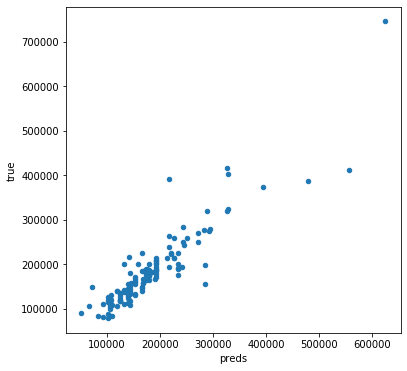

In [186]:
# Model 4
# Decision Tree regressor

#error analysis: let's look at the prediction-true values as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

dt_preds = pd.DataFrame({"preds":dt_y_pred, "true":y_test})
#preds["residuals"] = preds["true"] - preds["preds"]
dt_preds.plot(x = "preds", y = "true",kind = "scatter")